# Исследование продаж игр интернет-магазина «Стримчик»

**Описание проекта**

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта**

Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
 
**План исследования**
1. Изучить общую информацию;
2. Подготовить данные;
3. Провести исследовательский анализ данных;
4. Составить портрет пользователя каждого региона;
5. Проверить гипотезы.

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

    Данные за 2016 год могут быть неполными.

## Изучение общей информации

1.1 Подключим библиокету panpas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st


1.2 Откроем файл по пути '/datasets/games.csv' и изучим информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Вывод:</b>

Были выведены и изучены данные по пути '/datasets/games.csv'. 

По полученным данным можно сделать вывод, что перед проведением исследовательского анализа следует подготовить данные, а именно:
1. Привести названия столбцов к нижнему регистру;
2. Проверить данные на дубликаты;
3. Преобразовать данные в нужные типы;
4. Обработать пропуски.

## Подготовка данных

2.1 Приведем названия столбцов к нижнему регистру.

In [5]:
for column in data.columns:
    data = data.rename(columns={column:column.lower()})
data.columns   

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

2.2 Преобразуем данные в нужные типы

У столбца год выпуска указан тип float64. Удалим строки с пропущенными значениями в данном столбце и преобразуем данный столбец в целочисленный тип.

In [6]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype('int')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Столбец user_score преобразуем в вещественный тип, так как данный столбец отражает оценку пользователей (максимум 10).

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец user_score содержит значение tbd, что означает 'подлежит определению'. Для преобразования данного столбца используем функцию to_numeric и установим параметр errors = 'coerce', чтобы некорректные значения заменить на NaN

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


2.3 Обработаем пропуски

В столбцах name и genre не хватает по 2 значения. Удалим строки с пропущенными значениями в данных столбцах.

In [10]:
data = data.dropna(subset=['name','genre']).reset_index(drop=True)

2.4 Проверка на дубликаты

In [11]:
data.duplicated().sum()

0

Наличие явных дубликатов отсутствует.

In [12]:

pd.set_option('display.max_columns', None)
for value in data['name'].sort_values().unique():
    print(value)

 Beyblade Burst
 Fire Emblem Fates
 Frozen: Olaf's Quest
 Haikyu!! Cross Team Match!
 Tales of Xillia 2
'98 Koshien
.hack//G.U. Vol.1//Rebirth
.hack//G.U. Vol.2//Reminisce
.hack//G.U. Vol.2//Reminisce (jp sales)
.hack//G.U. Vol.3//Redemption
.hack//Infection Part 1
.hack//Link
.hack//Mutation Part 2
.hack//Outbreak Part 3
.hack//Quarantine Part 4: The Final Chapter
.hack: Sekai no Mukou ni + Versus
007 Racing
007: Quantum of Solace
007: The World is not Enough
007: Tomorrow Never Dies
1 vs. 100
1/2 Summer +
10 Minute Solution
100 All-Time Favorites
100 Classic Books
100 Classic Games
1000 Cooking Recipes from ELLE à table
1001 Touch Games
101-in-1 Explosive Megamix
101-in-1 Party Megamix Wii
101-in-1 Sports Megamix
101-in-1 Sports Party Megamix
1080°: TenEighty Snowboarding
11eyes: CrossOver
12-Sai. Honto no Kimochi
12-Sai. Koisuru Diary
12Riven: The Psi-Climinal of Integral
15 Days
1701 A.D.
18 Wheeler: American Pro Trucker
18 Wheels of Steel: Extreme Trucker
18 Wheels of Steel: Extre

Наличие неявный дубликатов отсутствует.

2.5 Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [13]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

<AxesSubplot:>

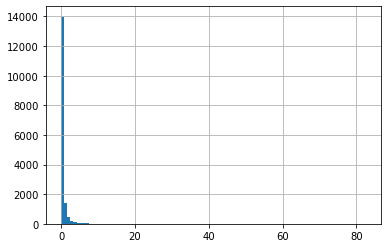

In [15]:
data['total_sales'].hist(bins = 100)

<b>Вывод:</b>
1. Приведены названия столбцов к нижнему регистру.
2. Преобразованы данные в нужные типы, а именно столбец year_of_release из типа float в тип int, user_score из типа object в тип float.
3. Обработаны пропуски там, где это необходимо, а имено в удалены строки с пропусками в столбцах name, genre, year_of_release.
4. Проверено на наличие дубликатов. Дубликаты отсутствуют.
5. Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец total_sales.

## Исследовательский анализ данных

3.1 Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:>

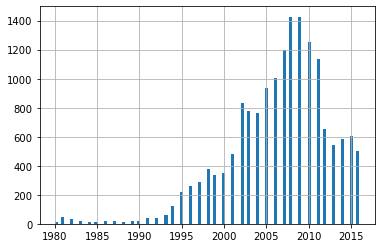

In [16]:
data['year_of_release'].hist(bins=100)

Больше всего игр выпускалось в 2008-2009 годах. До 1995 года выпускалось незначительное количество игр. Отбросим эти данные.

In [17]:
data = data.query('year_of_release > 1994')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
data.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by = 'total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:>

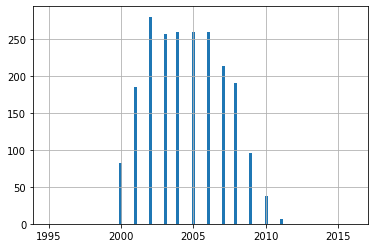

In [19]:
data.query('platform == "PS2"')['year_of_release'].hist(bins = 100, range = (1995,2016))

Платформа PS2 была в продаже 12 лет.

<AxesSubplot:>

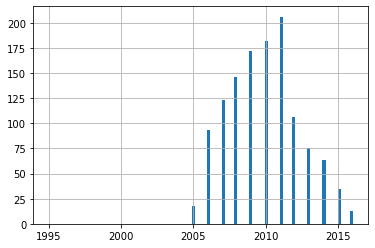

In [20]:
data.query('platform == "X360"')['year_of_release'].hist(bins = 100, range = (1995,2016))

Платформа X360 была в продаже 12 лет.

<AxesSubplot:>

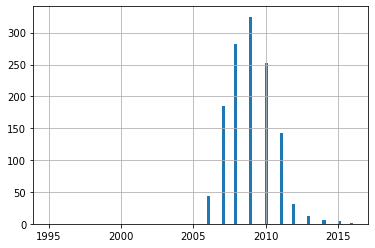

In [21]:
data.query('platform == "Wii"')['year_of_release'].hist(bins = 100, range = (1995,2016))

Платформа X360 в продаже 11 лет.

<AxesSubplot:>

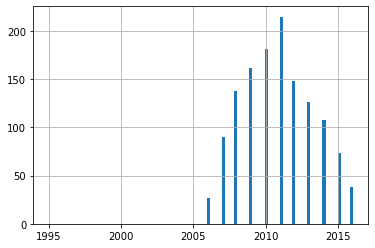

In [22]:
data.query('platform == "PS3"')['year_of_release'].hist(bins = 100, range = (1995,2016))

Платформа PS3 в продаже 11 лет.

<AxesSubplot:>

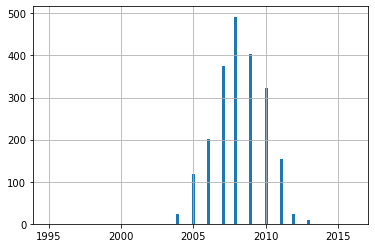

In [23]:
data.query('platform == "DS"')['year_of_release'].hist(bins = 100, range = (1995,2016))

Платформа DS в продаже 10 лет.

<AxesSubplot:>

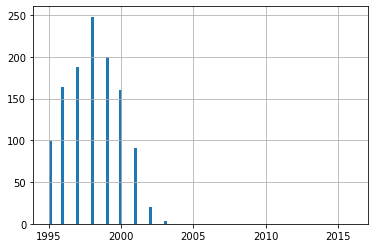

In [24]:
data.query('platform == "PS"')['year_of_release'].hist(bins = 100, range = (1995,2016))

Платформа PS в продаже 9 лет.

Популярные платформы надохятся в продаже 9-12 лет.

3.3 Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Возьмем данные за последние 3 года.

In [25]:
data_for_current_period = data.query('year_of_release > 2013')

In [26]:
data_for_current_period.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by = 'total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


3.4 Какие платформы лидируют по продажам, растут или падают?

За актуальный период лидерами продаж являются PS4,  XOne, 3DS.

Проверим продажи PS4 за последние 3 года.

<AxesSubplot:>

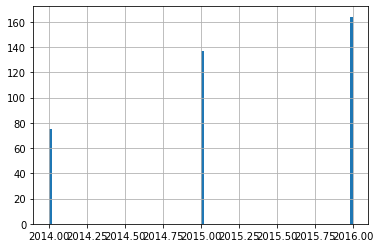

In [27]:
data_for_current_period.query('platform == "PS4"')['year_of_release'].hist(bins = 100, range = (2014,2016))

По построенной гистограмме можно сделать вывод, что продажи платформы PS4 растут. Это потенциально прибыльная платформа.

Проверим продажи XOne за последние 3 года.

<AxesSubplot:>

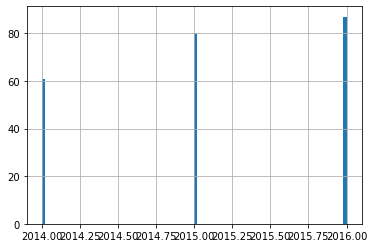

In [28]:
data_for_current_period.query('platform == "XOne"')['year_of_release'].hist(bins = 100, range = (2014,2016))

По построенной гистограмме можно сделать вывод, что продажи платформы XOne растут. Это потенциально прибыльная платформа.

Проверим продажи 3DS за последние 3 года.

<AxesSubplot:>

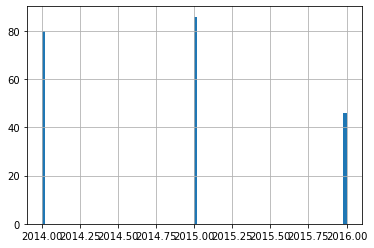

In [29]:
data_for_current_period.query('platform == "3DS"')['year_of_release'].hist(bins = 100, range = (2014,2016))

По построенной гистограмме можно сделать вывод, что продажи платформы 3DS идут на спад, однако она может продаваться еще несколько лет (2-4). Это потенциально прибыльная платформа.

Проверим продажи PS3 за последние 3 года.

<AxesSubplot:>

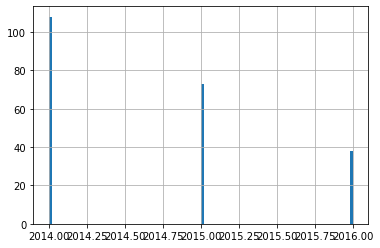

In [30]:
data_for_current_period.query('platform == "PS3"')['year_of_release'].hist(bins = 100, range = (2014,2016))

По построенной гистограмме можно сделать вывод, что продажи платформы PS3 идут на спад, однако она может продаваться еще несколько лет (1-3). 

Проверим продажи X360 за последние 3 года.

<AxesSubplot:>

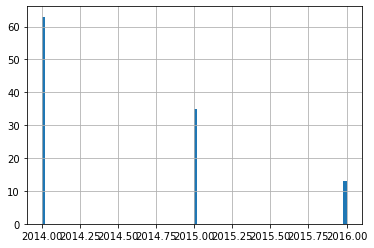

In [31]:
data_for_current_period.query('platform == "X360"')['year_of_release'].hist(bins = 100, range = (2014,2016))

По построенной гистограмме можно сделать вывод, что продажи платформы X360 идут на спад и скорее всего скоро исчезнут с рынка.

Проверим продажи WiiU за последние 3 года.

<AxesSubplot:>

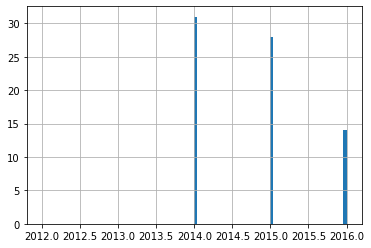

In [32]:
data_for_current_period.query('platform == "WiiU"')['year_of_release'].hist(bins = 100, range = (2012,2016))

По построенной гистограмме можно сделать вывод, что продажи платформы WiiU идут на спад и скорее всего скоро исчезнут с рынка.

За актуальный период лидерами продаж и потенциально прибыльными являются платформы PS4,  XOne, 3DS, PS3. 

3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим график «ящик с усами» для продаж платформы PS4, XOne, 3DS, PS3.

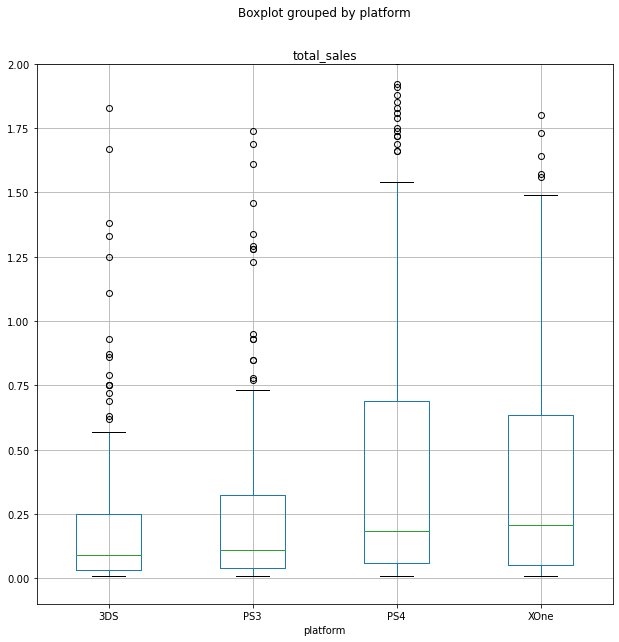

In [33]:
data_for_current_period.query('(platform == "PS4") | (platform == "XOne") | (platform == "PS3") | (platform == "3DS")').boxplot('total_sales', by='platform', figsize=(10,10))
plt.ylim(-0.1,2);


Для платформы PS4 большая часть значений лежит в диапазоне до 0.69 миллионов проданных копий. Медиана находится на 0.19 миллионах. Первый кварталь приходится на 0.16 миллионов проданных копий.

Для платформы XOne большая часть значений лежит в диапазоне до 0.63 миллионов проданных копий. Медиана находится на 0.2 миллионах. Первый кварталь приходится на 0.15 миллионов проданных копий.

Для платформы PS3 большая часть значений лежит в диапазоне до 0.32 миллионов проданных копий. Медиана находится на 0.11 миллионах. Первый кварталь приходится на 0.14 миллионов проданных копий.

Для платформы 3DS большая часть значений лежит в диапазоне до 0.26 миллионов проданных копий. Медиана находится на 0.1 миллионах. Первый кварталь приходится на 0.13 миллионов проданных копий.

3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы PS4 отзывы пользователей и критиков. 

Выделим таблицу, в которой есть оценки критиков.

In [34]:
data_for_current_period_with_critic_score = data_for_current_period.dropna(subset=['critic_score']).reset_index(drop=True)

Выделим таблицу, в которой есть оценки пользователей.

In [35]:
data_for_current_period_with_user_score = data_for_current_period.dropna(subset=['user_score']).reset_index(drop=True)

Проверим взаимосвязь между продажами платформы PS4 и оценками критиков.

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

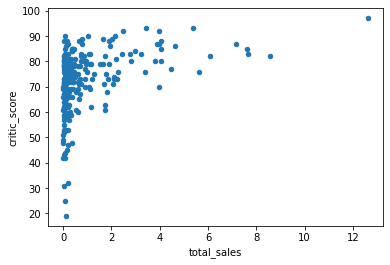

In [36]:
data_for_current_period_with_critic_score.query('platform == "PS4"').plot(x='total_sales', y='critic_score', kind='scatter')

In [37]:
data_for_current_period_with_critic_score.query('platform == "PS4"')['total_sales'].corr(data_for_current_period_with_critic_score.query('platform == "PS4"')['critic_score'])

0.40266141068104083

Проверим взаимосвязь между продажами платформы PS4 и оценками пользователей.

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

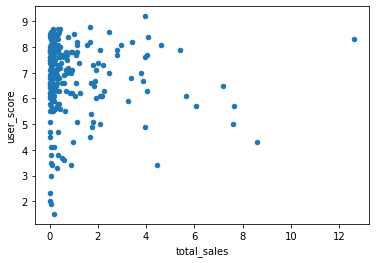

In [38]:
data_for_current_period_with_user_score.query('platform == "PS4"').plot(x='total_sales', y='user_score', kind='scatter')

In [39]:
data_for_current_period_with_user_score.query('platform == "PS4"')['total_sales'].corr(data_for_current_period_with_user_score.query('platform == "PS4"')['user_score'])

-0.040131589472697356

По результатам расчитанной корреляции можно сделать вывод, что связь для платформы PS4 между платежами и оценками критиков слабая. Однако, по построенным диаграммам рассеяния видно, что для оценок критиков большие суммы платежей (от 1 миллиона для оценок пользователей) осуществляются только для платформ с высокими оценками (от 60 по 100 балльной шкале для оценок критиков) и наблюдается прямая связь. Между оценками пользователей и платежами для платформы PS4 связи нет.

3.7 Соотнесем выводы с продажами игр на других платформах.

Проверим взаимосвязь между продажами платформы X360 и оценками критиков.

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

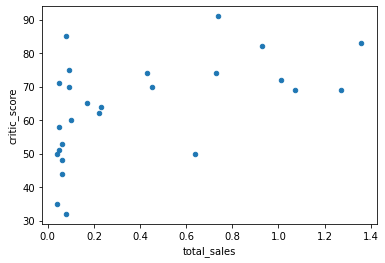

In [40]:
data_for_current_period_with_critic_score.query('platform == "X360"').plot(x='total_sales', y='critic_score', kind='scatter')

In [41]:
data_for_current_period_with_critic_score.query('platform == "X360"')['total_sales'].corr(data_for_current_period_with_critic_score.query('platform == "X360"')['critic_score'])

0.5257228356581523

Проверим взаимосвязь между продажами платформы X360 и оценками пользователей.

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

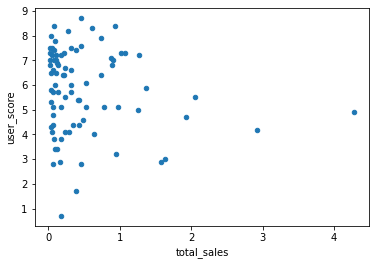

In [42]:
data_for_current_period_with_user_score.query('platform == "X360"').plot(x='total_sales', y='user_score', kind='scatter')

In [43]:
data_for_current_period_with_user_score.query('platform == "X360"')['total_sales'].corr(data_for_current_period_with_user_score.query('platform == "X360"')['user_score'])

-0.138444570945665

По результатам расчитанной корреляции можно сделать вывод, что связь для платформы X360 между платежами и оценками критиков прямая слабая. Между оценками пользователей и платежами для платформы X360 связи практически нет.

Проверим взаимосвязь между продажами платформы PS3 и оценками критиков.

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

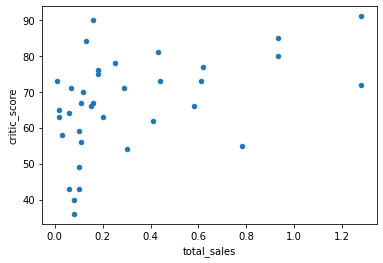

In [44]:
data_for_current_period_with_critic_score.query('platform == "PS3"').plot(x='total_sales', y='critic_score', kind='scatter')

In [45]:
data_for_current_period_with_critic_score.query('platform == "PS3"')['total_sales'].corr(data_for_current_period_with_critic_score.query('platform == "PS3"')['critic_score'])

0.44657460493190704

Проверим взаимосвязь между продажами платформы PS3 и оценками пользователей.

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

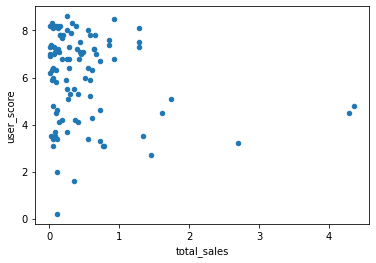

In [46]:
data_for_current_period_with_user_score.query('platform == "PS3"').plot(x='total_sales', y='user_score', kind='scatter')

In [47]:
data_for_current_period_with_user_score.query('platform == "PS3"')['total_sales'].corr(data_for_current_period_with_user_score.query('platform == "PS3"')['user_score'])

-0.16676141347662116

По результатам расчитанной корреляции можно сделать вывод, что связь для платформы PS3 между платежами и оценками критиков слабая. Однако, по построенным диаграммам рассеяния видно, что для оценок критиков суммы платежей от 0.2 миллиона наблюдается прямая связь. Между оценками пользователей и платежами для платформы PS3 связи практически нет.

Проверим взаимосвязь между продажами платформы 3DS и оценками критиков.

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

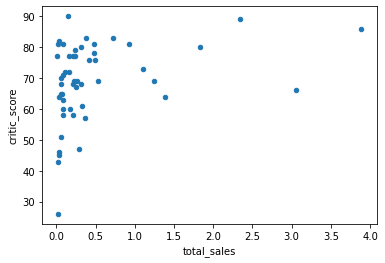

In [48]:
data_for_current_period_with_critic_score.query('platform == "3DS"').plot(x='total_sales', y='critic_score', kind='scatter')

In [49]:
data_for_current_period_with_critic_score.query('platform == "3DS"')['total_sales'].corr(data_for_current_period_with_critic_score.query('platform == "3DS"')['critic_score'])

0.31411749286905105

Проверим взаимосвязь между продажами платформы 3DS и оценками пользователей.

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

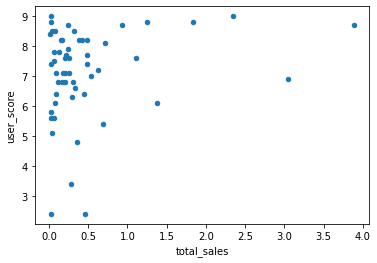

In [50]:
data_for_current_period_with_user_score.query('platform == "3DS"').plot(x='total_sales', y='user_score', kind='scatter')

In [51]:
data_for_current_period_with_user_score.query('platform == "3DS"')['total_sales'].corr(data_for_current_period_with_user_score.query('platform == "3DS"')['user_score'])

0.2151932718527028

По результатам расчитанной корреляции можно сделать вывод, что связь для платформы 3DS между платежами и оценками критиков и пользователей слабая. Однако, по построенным диаграммам рассеяния видно, что для больших сумм платежей, чем выше оценки (от 5 по 10 балльной шкале для оценок пользователей, и от 60 по 100 балльной шкале для оценок критиков), тем больше суммы платежей (от 0.7 миллионов для оценок пользователей, 1 для оценок критиков).

3.8 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

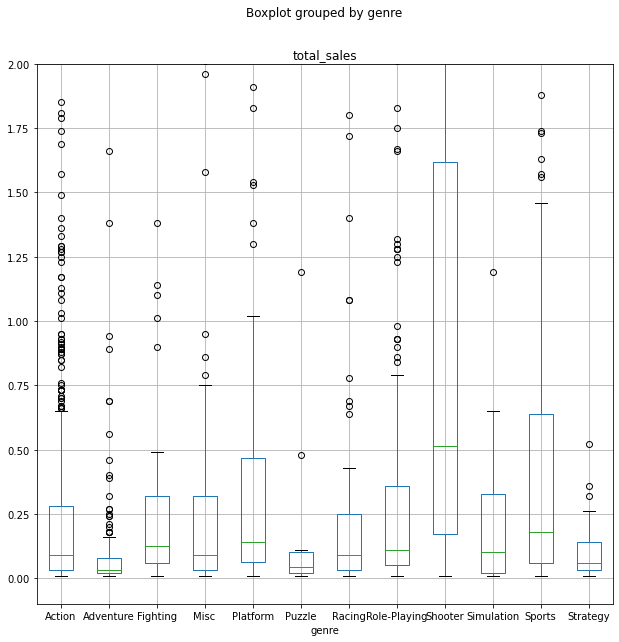

In [52]:
data_for_current_period.boxplot('total_sales', by='genre', figsize=(10,10))

plt.ylim(-0.1,2);

In [53]:
data_for_current_period_for_genre = data_for_current_period.pivot_table(index='genre',values='total_sales',aggfunc=['sum','count','mean'])#.sort_values(by = 'total_sales', ascending=False)

In [54]:
data_for_current_period_for_genre.columns = ['сумма', 'количество','медиана']

In [55]:
data_for_current_period_for_genre.sort_values(by = 'медиана', ascending=False)

,сумма,количество,медиана
genre,,,
Shooter,170.94,128,1.335469
Sports,109.48,161,0.680000
Platform,18.09,38,0.476053
Fighting,28.22,60,0.470333
Role-Playing,101.44,221,0.459005
Racing,27.52,69,0.398841
Misc,37.55,113,0.332301
Action,199.36,619,0.322068
Simulation,13.13,44,0.298409


По результатам "ящика с усами" в разбивке по жанрам можно сделать вывод, что лучше всего и стабильнее продается Shooter. Его медианное значение почти в два раза превышает следущий жанр Sports. Также неплохие результаты показали жанры Platform, Fighting, Role-Playing.

Самое минимальное медианное значение у жанра Adventure. У данного жанра продано много игр, но его продажи являются очень низкими. 

Жанр Action продает больше всего игр (619), однако его медианное значение находится ниже середины рейтинга медианных значений по жанрам.

<b>Вывод</b>
```
1. Было изучено, сколько игр выпускалось в разные годы. Больше всего игр выпускалось в 2008-2009 годах. До 1995 года выпускалось незначительное количество игр. Эти данные были отброшены.
2. Было изучено, как менялись продажи по платформам. Были выбраны платформы с наибольшими суммарными продажами и построены распределение по годам. Популярные платформы надохятся в продаже 9-12 лет.
3. Взяли данные за соответствующий актуальный период, а именно за последние 3 года.
4. За актуальный период лидерами продаж и потенциально прибыльными являются платформы PS4,  XOne, 3DS, PS3. 
5. Был простроен график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    5.1 Для платформы PS4 большая часть значений лежит в диапазоне до 0.69 миллионов проданных копий. Медиана находится на 0.19 миллионах. Первый кварталь приходится на 0.16 миллионов проданных копий.
    5.2 Для платформы XOne большая часть значений лежит в диапазоне до 0.63 миллионов проданных копий. Медиана находится на 0.2 миллионах. Первый кварталь приходится на 0.15 миллионов проданных копий.
    5.3 Для платформы PS3 большая часть значений лежит в диапазоне до 0.32 миллионов проданных копий. Медиана находится на 0.11 миллионах. Первый кварталь приходится на 0.14 миллионов проданных копий.
    5.4 Для платформы 3DS большая часть значений лежит в диапазоне до 0.26 миллионов проданных копий. Медиана находится на 0.1 миллионах. Первый кварталь приходится на 0.13 миллионов проданных копий.
6. Было изучено, как влияют на продажи внутри одной популярной платформы PS4 отзывы пользователей и критиков.
По результатам расчитанной корреляции можно сделать вывод, что связь для платформы PS4 между платежами и оценками критиков слабая. Однако, по построенным диаграммам рассеяния видно, что для оценок критиков большие суммы платежей (от 1 миллиона для оценок пользователей) осуществляются только для платформ с высокими оценками (от 60 по 100 балльной шкале для оценок критиков) и наблюдается прямая связь. Между оценками пользователей и платежами для платформы PS4 связи нет.
7. Соотнесены выводы с продажами игр на других платформах.
    7.1 По результатам расчитанной корреляции можно сделать вывод, что связь для платформы X360 между платежами и оценками критиков прямая слабая. Между оценками пользователей и платежами для платформы X360 связи практически нет.
    7.2 По результатам расчитанной корреляции можно сделать вывод, что связь для платформы PS3 между платежами и оценками критиков слабая. Однако, по построенным диаграммам рассеяния видно, что для оценок критиков суммы платежей от 0.2 миллиона наблюдается прямая связь. Между оценками пользователей и платежами для платформы PS3 связи практически нет.
    7.3 По результатам расчитанной корреляции можно сделать вывод, что связь для платформы 3DS между платежами и оценками критиков и пользователей слабая. Однако, по построенным диаграммам рассеяния видно, что для больших сумм платежей, чем выше оценки (от 5 по 10 балльной шкале для оценок пользователей, и от 60 по 100 балльной шкале для оценок критиков), тем больше суммы платежей (от 0.7 миллионов для оценок пользователей, 1 для оценок критиков).
8. Изучено общее распределение игр по жанрам. 
По результатам "ящика с усами" в разбивке по жанрам можно сделать вывод, что лучше всего и стабильнее продается Shooter. Его медианное значение почти в два раза превышает следущий жанр Sports. Также неплохие результаты показали жанры Platform, Fighting, Role-Playing.
Самое минимальное медианное значение у жанра Adventure. У данного жанра продано много игр, но его продажи являются очень низкими.
Жанр Action продает больше всего игр (619), однако его медианное значение находится ниже середины рейтинга медианных значений по жанрам.
```

## Составим портрет пользователя каждого региона

4.1 Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5).

Рассмотрим топ-5 продаж платформ в Северной Америке.

In [56]:
data_for_current_period_platform_na_sales = data_for_current_period.pivot_table(index = 'platform', values = 'na_sales',aggfunc = 'sum').sort_values(by='na_sales',ascending = False).head()
data_for_current_period_platform_na_sales

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [57]:
data_for_current_period['platform_na_sales'] = data_for_current_period['platform'].where(data_for_current_period['platform'].isin(data_for_current_period_platform_na_sales.index), 'Другие')

C:\Users\gabid\AppData\Local\Temp\ipykernel_1412\64081079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_current_period['platform_na_sales'] = data_for_current_period['platform'].where(data_for_current_period['platform'].isin(data_for_current_period_platform_na_sales.index), 'Другие')


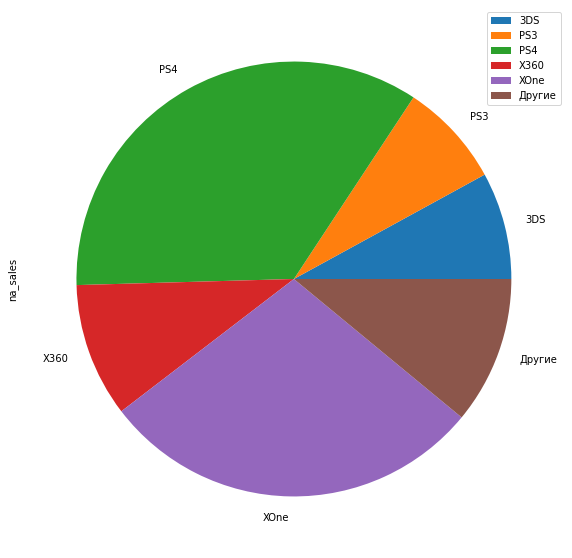

In [58]:
data_for_current_period.pivot_table(index = 'platform_na_sales', values = 'na_sales',aggfunc = 'sum').plot(y='na_sales',kind='pie',figsize=(10,10));

Рассмотрим топ-5 продаж платформ в Европе.

In [59]:
data_for_current_period_platform_eu_sales = data_for_current_period.pivot_table(index = 'platform', values = 'eu_sales',aggfunc = 'sum').sort_values(by='eu_sales',ascending = False).head()
data_for_current_period_platform_eu_sales

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [60]:
data_for_current_period['platform_eu_sales'] = data_for_current_period['platform'].where(data_for_current_period['platform'].isin(data_for_current_period_platform_eu_sales.index), 'Другие')

C:\Users\gabid\AppData\Local\Temp\ipykernel_1412\3538962300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_current_period['platform_eu_sales'] = data_for_current_period['platform'].where(data_for_current_period['platform'].isin(data_for_current_period_platform_eu_sales.index), 'Другие')


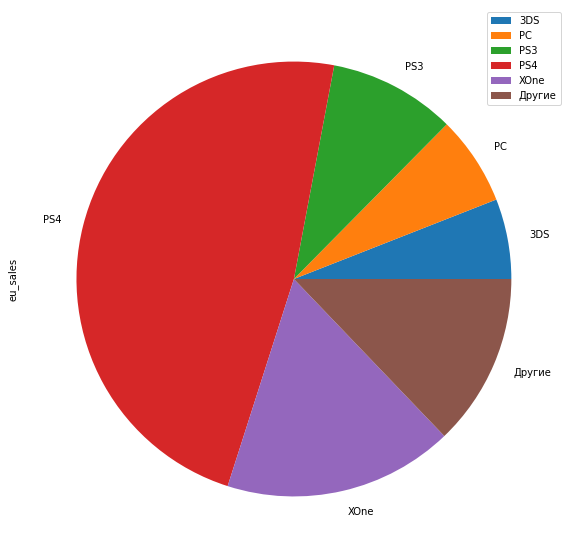

In [61]:
data_for_current_period.pivot_table(index = 'platform_eu_sales', values = 'eu_sales',aggfunc = 'sum').plot(y='eu_sales',kind='pie',figsize=(10,10));

Рассмотрим топ-5 продаж платформ в Японии.

In [62]:
data_for_current_period_platform_jp_sales = data_for_current_period.pivot_table(index = 'platform', values = 'jp_sales',aggfunc = 'sum').sort_values(by='jp_sales',ascending = False).head()
data_for_current_period_platform_jp_sales

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


In [63]:
data_for_current_period['platform_jp_sales'] = data_for_current_period['platform'].where(data_for_current_period['platform'].isin(data_for_current_period_platform_jp_sales.index), 'Другие')

C:\Users\gabid\AppData\Local\Temp\ipykernel_1412\4196122774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_current_period['platform_jp_sales'] = data_for_current_period['platform'].where(data_for_current_period['platform'].isin(data_for_current_period_platform_jp_sales.index), 'Другие')


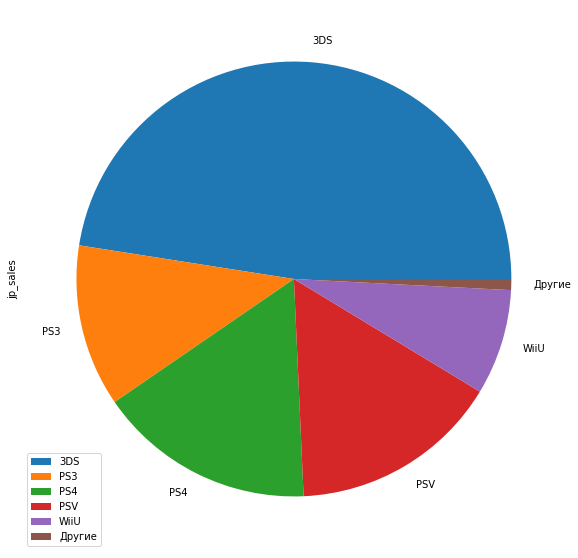

In [64]:
data_for_current_period.pivot_table(index = 'platform_jp_sales', values = 'jp_sales',aggfunc = 'sum').plot(y='jp_sales',kind='pie',figsize=(10,10));

По результатам продаж в каждом из регионе можно сделать следующий вывод: 
1. Больше всего продаж осуществляется в Европе, меньше всего продаж в Японии;
2. Лидером продаж в Северной Америке и Европе является PS4, а в Японии 3DS.
3. Платформы PS4,PS3, 3DS находятся в топе продаж во всех трех регионах.

4.2 Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные жанры (топ-5).

Рассмотрим топ-5 продаж жанров в Северной Америке.

In [65]:
data_for_current_period_genre_na_sales = data_for_current_period.pivot_table(index = 'genre', values = 'na_sales',aggfunc = 'sum').sort_values(by='na_sales',ascending = False).head()
data_for_current_period_genre_na_sales

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [66]:
data_for_current_period['genre_na_sales'] = data_for_current_period['genre'].where(data_for_current_period['genre'].isin(data_for_current_period_genre_na_sales.index), 'Другие')

C:\Users\gabid\AppData\Local\Temp\ipykernel_1412\141252099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_current_period['genre_na_sales'] = data_for_current_period['genre'].where(data_for_current_period['genre'].isin(data_for_current_period_genre_na_sales.index), 'Другие')


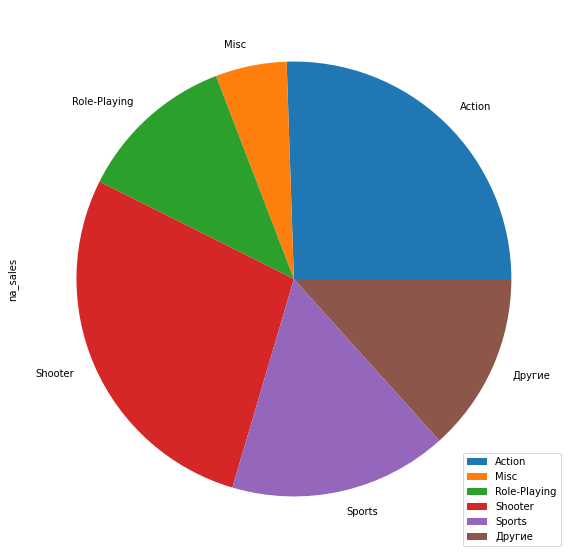

In [67]:
data_for_current_period.pivot_table(index = 'genre_na_sales', values = 'na_sales',aggfunc = 'sum').plot(y='na_sales',kind='pie',figsize=(10,10));

Рассмотрим топ-5 продаж жанров в Европе.

In [68]:
data_for_current_period_genre_eu_sales = data_for_current_period.pivot_table(index = 'genre', values = 'eu_sales',aggfunc = 'sum').sort_values(by='eu_sales',ascending = False).head()
data_for_current_period_genre_eu_sales

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [69]:
data_for_current_period['genre_eu_sales'] = data_for_current_period['genre'].where(data_for_current_period['genre'].isin(data_for_current_period_genre_eu_sales.index), 'Другие')

C:\Users\gabid\AppData\Local\Temp\ipykernel_1412\2550452876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_current_period['genre_eu_sales'] = data_for_current_period['genre'].where(data_for_current_period['genre'].isin(data_for_current_period_genre_eu_sales.index), 'Другие')


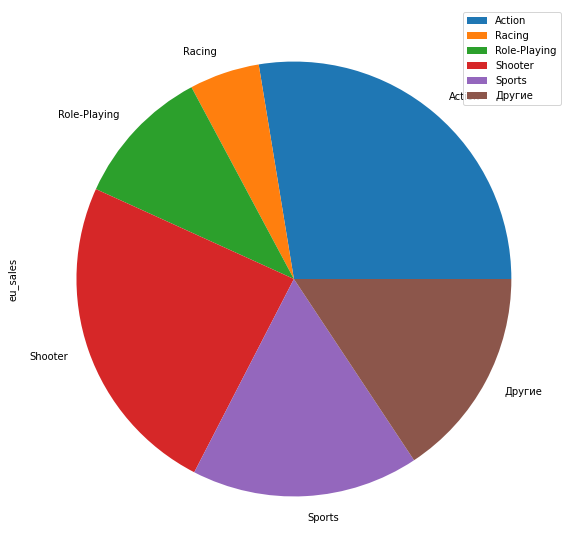

In [70]:
data_for_current_period.pivot_table(index = 'genre_eu_sales', values = 'eu_sales',aggfunc = 'sum').plot(y='eu_sales',kind='pie',figsize=(10,10));

Рассмотрим топ-5 продаж жанров в Японии.

In [71]:
data_for_current_period_genre_jp_sales = data_for_current_period.pivot_table(index = 'genre', values = 'jp_sales',aggfunc = 'sum').sort_values(by='jp_sales',ascending = False).head()
data_for_current_period_genre_jp_sales

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


In [72]:
data_for_current_period['genre_jp_sales'] = data_for_current_period['genre'].where(data_for_current_period['genre'].isin(data_for_current_period_genre_jp_sales.index), 'Другие')

C:\Users\gabid\AppData\Local\Temp\ipykernel_1412\3136940730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_current_period['genre_jp_sales'] = data_for_current_period['genre'].where(data_for_current_period['genre'].isin(data_for_current_period_genre_jp_sales.index), 'Другие')


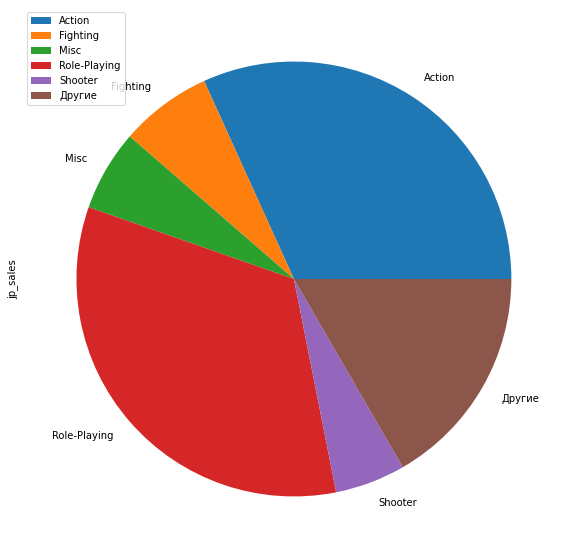

In [73]:
data_for_current_period.pivot_table(index = 'genre_jp_sales', values = 'jp_sales',aggfunc = 'sum').plot(y='jp_sales',kind='pie',figsize=(10,10));

По результатам продаж в каждом из регионе можно сделать следующий вывод:

1. Больше всего продаж осуществляется в Северной Америке и Европе, меньше всего продаж в Японии;
2. Самые популярные жанры для всех трех регионов являются Action, Shooter, Role-Playing.

4.3 Определим для пользователя каждого региона (NA, EU, JP):
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Заменим пустые значения в столбце рейтинга на значение 'Без рейтинга'.

In [74]:
data_for_current_period['rating'] = data_for_current_period['rating'].fillna('Без рейтинга')

C:\Users\gabid\AppData\Local\Temp\ipykernel_1412\3796114237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_current_period['rating'] = data_for_current_period['rating'].fillna('Без рейтинга')


In [75]:
data_for_current_period.pivot_table(index = 'rating', values = 'na_sales',aggfunc = 'sum').sort_values(by='na_sales',ascending = False)

,na_sales
rating,
M,96.42
Без рейтинга,64.72
E,50.74
T,38.95
E10+,33.23


In [76]:
data_for_current_period.pivot_table(index = 'rating', values = 'eu_sales',aggfunc = 'sum').sort_values(by='eu_sales',ascending = False)

,eu_sales
rating,
M,93.44
Без рейтинга,58.95
E,58.06
T,34.07
E10+,26.16


In [77]:
data_for_current_period.pivot_table(index = 'rating', values = 'jp_sales',aggfunc = 'sum').sort_values(by='jp_sales',ascending = False)

,jp_sales
rating,
Без рейтинга,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


По результатам продаж можно сделать следующий вывод:
1. Игры без рейтинга находятся в топе 2 продаж во всех трех регионах.
2. Северной Америке и Европе лидером продаж являются игры с рейтинтом M.
3. Игры с рейтингом E10+ продаются хуже всего.

<b>Вывод:</b>
```
1. Определено для пользователя каждого региона самые популярные платформы (топ-5).
    1.1 Больше всего продаж осуществляется в Европе, меньше всего продаж в Японии;
    1.2 Лидером продаж в Северной Америке и Европе является PS4, а в Японии 3DS.
    1.3 Платформы PS4,PS3, 3DS находятся в топе продаж во всех трех регионах.
2. Определено для пользователя каждого региона самые популярные жанры (топ-5).
    2.1 Больше всего продаж осуществляется в Северной Америке и Европе, меньше всего продаж в Японии;
    2.2 Самые популярные жанры для всех трех регионов являются Action, Shooter, Role-Playing.
3. Определено для пользователя каждого региона как влияет ли рейтинг ESRB на продажи в отдельном регионе.
    3.1 Игры без рейтинга находятся в топе 2 продаж во всех трех регионах.
    3.2 Северной Америке и Европе лидером продаж являются игры с рейтинтом M.
    3.3 Игры с рейтингом E10+ продаются хуже всего.
```

## Проверьте гипотезы

```
Нулевая гипотеза формилируется всегда так, чтобы использовать знак равенства.
Для проверки гипотез будем использовать scipy.stats.ttest_ind(), так как нам нужно сопоставить средние двух генеральных совокупностей.
```

5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
H_a: Средние пользовательские рейтинги платформ Xbox One и PC разные.
alpha = 0.05
```

In [78]:
results = st.ttest_ind(
    data_for_current_period_with_user_score[data_for_current_period_with_user_score['platform'] =='XOne']['user_score'], 
    data_for_current_period_with_user_score[data_for_current_period_with_user_score['platform'] =='PC']['user_score'],equal_var=False)

# alpha - значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)

if results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
H_a: Средние пользовательские рейтинги жанров Action и Sports разные.
alpha = 0.05
```

In [79]:
results = st.ttest_ind(
    data_for_current_period_with_user_score[data_for_current_period_with_user_score['genre'] =='Action']['user_score'], 
    data_for_current_period_with_user_score[data_for_current_period_with_user_score['genre'] =='Sports']['user_score'],equal_var=False)

# alpha - значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
print(results.pvalue)

if results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


<b>Вывод:</b>
```
Были проведены гипотезы:
1. 
H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
H_a: Средние пользовательские рейтинги платформ Xbox One и PC разные.
alpha = 0.05

Не получилось отвергнуть нулевую гипотезу. Соответственно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. 
H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
H_a: Средние пользовательские рейтинги жанров Action и Sports разные.
alpha = 0.05

Нулевая гипотеза была отвергнута. Соответственно, средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза формилируется всегда так, чтобы использовать знак равенства.
Для проверки гипотез был использован метод scipy.stats.ttest_ind(), так как нам нужно было сопоставить средние двух генеральных совокупностей.
```

## Общий вывод

1. На первом шаге была изучена общая информация.

    * Name — название игры
    * Platform — платформа
    * Year_of_Release — год выпуска
    * Genre — жанр игры
    * NA_sales — продажи в Северной Америке (миллионы проданных копий)
    * EU_sales — продажи в Европе (миллионы проданных копий)
    * JP_sales — продажи в Японии (миллионы проданных копий)
    * Other_sales — продажи в других странах (миллионы проданных копий)
    * Critic_Score — оценка критиков (максимум 100)
    * User_Score — оценка пользователей (максимум 10)
    * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
        
    По полученным данным можно был сделан вывод, что перед проведением исследовательского анализа следует подготовить данные, а именно:
    
    1) Привести названия столбцов к нижнему регистру;
    
    2) Проверить данные на дубликаты;
    
    3) Преобразовать данные в нужные типы;
    
    4) Обработать пропуски.


2. На втором шаге была проведена подготовка данных.

     2.1 Приведены названия столбцов к нижнему регистру.
     
     2.2 Преобразованы данные в нужные типы, а именно столбец year_of_release из типа float в тип int, user_score из типа object в тип float.
     
     2.3 Обработаны пропуски там, где это необходимо, а имено в удалены строки с пропусками в столбцах name, genre, year_of_release.
     
     2.4 Проверено на наличие дубликатов. Дубликаты отсутствуют.
     
     2.5 Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец total_sales.
     
     
3. На третьем шаге был проведен исследовательский анализ данных.

    3.1 Было изучено, сколько игр выпускалось в разные годы. Больше всего игр выпускалось в 2008-2009 годах. До 1995 года выпускалось незначительное количество игр. Эти данные были отброшены.
    
    3.2 Было изучено, как менялись продажи по платформам. Были выбраны платформы с наибольшими суммарными продажами и построены распределение по годам. Популярные платформы надохятся в продаже 9-12 лет.
    
    3.2 Взяли данные за соответствующий актуальный период, а именно за последние 3 года.
    
    3.4 За актуальный период лидерами продаж и потенциально прибыльными являются платформы PS4,  XOne, 3DS, PS3. 
    
    3.5 Был простроен график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    
        3.5.1 Для платформы PS4 большая часть значений лежит в диапазоне до 0.69 миллионов проданных копий. Медиана находится на 0.19 миллионах. Первый кварталь приходится на 0.16 миллионов проданных копий.
        
        3.5.2 Для платформы XOne большая часть значений лежит в диапазоне до 0.63 миллионов проданных копий. Медиана находится на 0.2 миллионах. Первый кварталь приходится на 0.15 миллионов проданных копий.
        
        3.5.3 Для платформы PS3 большая часть значений лежит в диапазоне до 0.32 миллионов проданных копий. Медиана находится на 0.11 миллионах. Первый кварталь приходится на 0.14 миллионов проданных копий.
        
        3.5.4 Для платформы 3DS большая часть значений лежит в диапазоне до 0.26 миллионов проданных копий. Медиана находится на 0.1 миллионах. Первый кварталь приходится на 0.13 миллионов проданных копий.
        
    3.6 Было изучено, как влияют на продажи внутри одной популярной платформы PS4 отзывы пользователей и критиков.
    По результатам расчитанной корреляции можно сделать вывод, что связь для платформы PS4 между платежами и оценками критиков слабая. Однако, по построенным диаграммам рассеяния видно, что для оценок критиков большие суммы платежей (от 1 миллиона для оценок пользователей) осуществляются только для платформ с высокими оценками (от 60 по 100 балльной шкале для оценок критиков) и наблюдается прямая связь. Между оценками пользователей и платежами для платформы PS4 связи нет.
    
    3.7 Соотнесены выводы с продажами игр на других платформах.
    
        3.7.1 По результатам расчитанной корреляции можно сделать вывод, что связь для платформы X360 между платежами и оценками критиков прямая слабая. Между оценками пользователей и платежами для платформы X360 связи практически нет.
        
        3.7.2 По результатам расчитанной корреляции можно сделать вывод, что связь для платформы PS3 между платежами и оценками критиков слабая. Однако, по построенным диаграммам рассеяния видно, что для оценок критиков суммы платежей от 0.2 миллиона наблюдается прямая связь. Между оценками пользователей и платежами для платформы PS3 связи практически нет.
        
        3.7.3 По результатам расчитанной корреляции можно сделать вывод, что связь для платформы 3DS между платежами и оценками критиков и пользователей слабая. Однако, по построенным диаграммам рассеяния видно, что для больших сумм платежей, чем выше оценки (от 5 по 10 балльной шкале для оценок пользователей, и от 60 по 100 балльной шкале для оценок критиков), тем больше суммы платежей (от 0.7 миллионов для оценок пользователей, 1 для оценок критиков).
        
    3.8 Изучено общее распределение игр по жанрам. 
    По результатам "ящика с усами" в разбивке по жанрам можно сделать вывод, что лучше всего и стабильнее продается Shooter. Его медианное значение почти в два раза превышает следущий жанр Sports. Также неплохие результаты показали жанры Platform, Fighting, Role-Playing.
    Самое минимальное медианное значение у жанра Adventure. У данного жанра продано много игр, но его продажи являются очень низкими.
    Жанр Action продает больше всего игр (619), однако его медианное значение находится ниже середины рейтинга медианных значений по жанрам.



4. На четвертом шаге был составлен портрет пользователя каждого региона.
    
    4.1 Определено для пользователя каждого региона самые популярные платформы (топ-5).
    
        4.1.1 Больше всего продаж осуществляется в Европе, меньше всего продаж в Японии.
    
        4.1.2 Лидером продаж в Северной Америке и Европе является PS4, а в Японии 3DS.
    
        4.1.3 Платформы PS4, PS3, 3DS находятся в топе продаж во всех трех регионах.
        
     4.2 Определено для пользователя каждого региона самые популярные жанры (топ-5).
     
        4.2.1 Больше всего продаж осуществляется в Северной Америке и Европе, меньше всего продаж в Японии.
        
        4.2.2 Самые популярные жанры для всех трех регионов являются Action, Shooter, Role-Playing.
        
     4.3 Определено для пользователя каждого региона как влияет ли рейтинг ESRB на продажи в отдельном регионе.
     
        4.3.1 Игры без рейтинга находятся в топе 2 продаж во всех трех регионах.
        
        4.3.2 Северной Америке и Европе лидером продаж являются игры с рейтинтом M.
        
        4.3.3 Игры с рейтингом E10+ продаются хуже всего.
        
5. Были проведены гипотезы.

    5.1 
        H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        H_a: Средние пользовательские рейтинги платформ Xbox One и PC разные.
        alpha = 0.05
        
        Не получилось отвергнуть нулевую гипотезу. Соответственно, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    5.2 
        H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
        H_a: Средние пользовательские рейтинги жанров Action и Sports разные.
        alpha = 0.05
        
        Нулевая гипотеза была отвергнута. Соответственно, средние пользовательские рейтинги жанров Action и Sports разные.

        Для проверки гипотез был использован метод scipy.stats.ttest_ind(), так как нам нужно было сопоставить средние двух генеральных совокупностей.
    
    
    По результатам данных на 2016 год за последние 3 года можно сделать вывод, что в 2017 году следует обратить внимание на платформы PS4, PS3, 3DS, XOne, так как они являются потенциально прибыльными, а также на жанры игр Action, Shooter, Role-Playing, так как они являются популярными во всех регионах.
    